# A Symbolic Representation of Time Series, with Implications for Streaming Algorithms

## Introduction

## The algorithm

## Timeseries Data

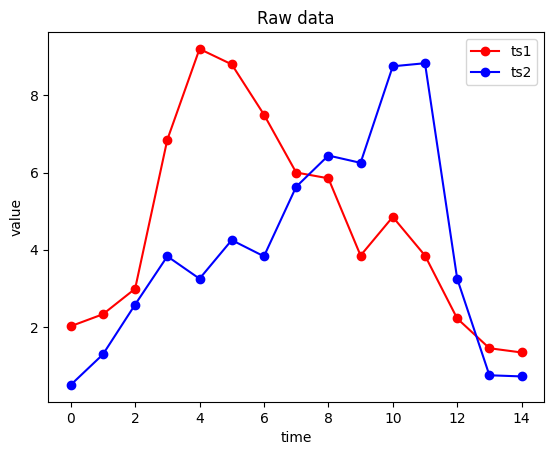

In [5]:
import numpy as np
import matplotlib.pyplot as plt

ts1= np.array([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34])
ts2= np.array([0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72])

x = list(range(len(ts1)))

plt.plot(x,ts1,'ro-', label = 'ts1')
plt.plot(x,ts2,'bo-', label = 'ts2')
plt.title('Raw data')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

In [10]:
eucl_dist = np.sqrt(np.sum((ts1 - ts2)**2))
print(f'The euclidian distance between ts1 and ts2 is {eucl_dist}')

The euclidian distance between ts1 and ts2 is 11.421256498301753


## Standardization or Z-score normalization

Z-normalization, also known as standardization or z-score normalization, is a data preprocessing technique used to transform a dataset so that it has a mean of zero and a standard deviation of one. This process is often applied to individual features or variables within the dataset. Z-normalization is commonly used in various fields, including statistics, machine learning, and data analysis, to bring data onto a common scale and mitigate the impact of different scales among variables.

The formula for calculating the z-score of a data point x in a dataset with mean μ and standard deviation σ is given by:

>## <center>$z = \frac{x - \mu}{\sigma}$</center>

In [12]:
znorm = lambda x: (x - np.mean(x))/ np.std(x)

ts1_znorm=znorm(ts1)
ts2_znorm=znorm(ts2)

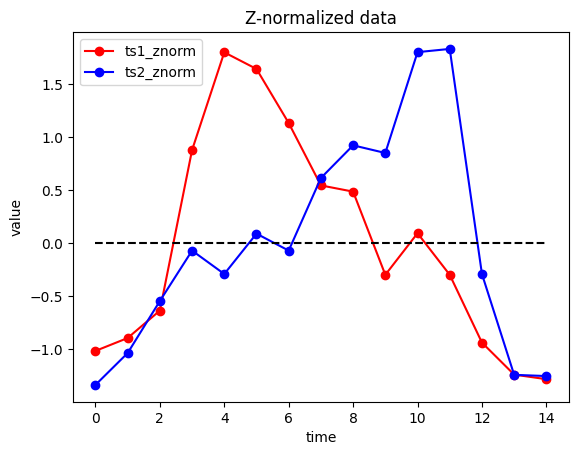

In [15]:
plt.plot(x,ts1_znorm,'ro-', label = 'ts1_znorm')
plt.plot(x,ts2_znorm,'bo-', label = 'ts2_znorm')
plt.plot(x,np.zeros(len(x)), 'k--')
plt.title('Z-normalized data')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

## PAA transform

Piecewise Aggregate Approximation (PAA) transformation is a technique used in time series analysis to reduce the amount of data and simplify analysis without losing too much important information. PAA divides a time series into segments or intervals and then calculates the average value within each segment. This creates a more compact representation of the original time series.

In [16]:
from helper_functions import paa

In [ ]:
paa_size = 9
s1_paa = paa(ts1_znorm, paa_size)
s_paa = paa(ts1_znorm, paa_size)